In [1]:
#Downloading the MNIST Dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


5


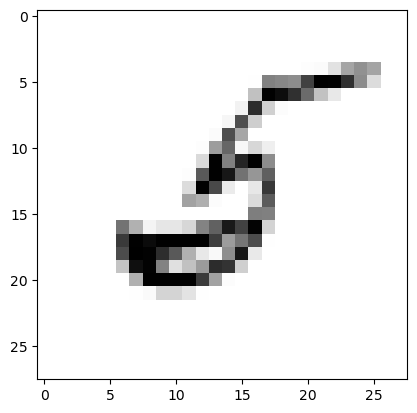

In [2]:
import matplotlib.pyplot as plt
image_index = 1111 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
input_shape = 28*28
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 784)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
from keras import Sequential
from keras.layers import Dense

In [6]:
model1 = Sequential()
#First Hidden Layer
model1.add(Dense(1500, activation='relu', input_dim=input_shape))#Second  Hidden Layer
model1.add(Dense(100, activation='relu'))
model1.add(Dense(10, activation='softmax'))

#Compiling the neural network
model1.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
model1.fit(x_train,y_train, batch_size=32, epochs=20)


model1.evaluate(x_test, y_test)

Epoch 1/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1813 - accuracy: 0.9449
Epoch 2/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0778 - accuracy: 0.9748
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0529 - accuracy: 0.9833
Epoch 4/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0404 - accuracy: 0.9874
Epoch 5/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0321 - accuracy: 0.9899
Epoch 6/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0272 - accuracy: 0.9911
Epoch 7/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0221 - accuracy: 0.9924
Epoch 8/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0196 - accuracy: 0.9940
Epoch 9/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 10/20
1875/1875 [==============================] - 30s 16m

[0.14265216886997223, 0.9796000123023987]

1/1 [==============================] - 0s 111ms/step
9


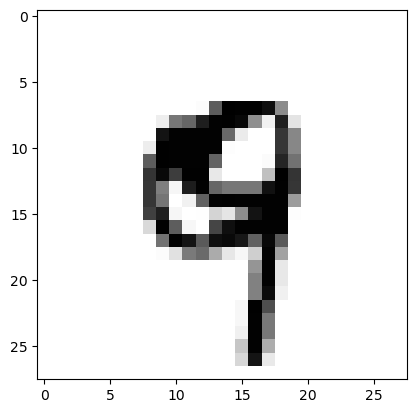

In [7]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model1.predict(x_test[image_index].reshape(1, 784, 1))
print(pred.argmax())

In [8]:
model2 = Sequential()
#First Hidden Layer
model2.add(Dense(1500, activation='relu', input_dim=input_shape))#Second  Hidden Layer
model2.add(Dense(750, activation='relu'))#Output Layer
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

#Compiling the neural network
model2.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
model2.fit(x_train,y_train, batch_size=32, epochs=20)


model2.evaluate(x_test, y_test)

Epoch 1/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1929 - accuracy: 0.9411
Epoch 2/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0906 - accuracy: 0.9727
Epoch 3/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0632 - accuracy: 0.9803
Epoch 4/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0486 - accuracy: 0.9849
Epoch 5/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0414 - accuracy: 0.9873
Epoch 6/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0338 - accuracy: 0.9897
Epoch 7/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 8/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0278 - accuracy: 0.9921
Epoch 9/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0254 - accuracy: 0.9928
Epoch 10/20
1875/1875 [==============================] - 46s 25m

[0.12803088128566742, 0.984499990940094]

In [9]:
from tensorflow.keras.layers import Dropout
from keras.layers import BatchNormalization
model3 = Sequential()
#First Hidden Layer
model3.add(Dense(1500, activation='relu', input_dim=input_shape))#Second  Hidden Layer
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(750, activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(10, activation='softmax'))

#Compiling the neural network
model3.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
model3.fit(x_train,y_train, batch_size=32, epochs=20)


model3.evaluate(x_test, y_test)

Epoch 1/20
1875/1875 [==============================] - 66s 33ms/step - loss: 0.2664 - accuracy: 0.9193
Epoch 2/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1533 - accuracy: 0.9526
Epoch 3/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1250 - accuracy: 0.9622
Epoch 4/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1096 - accuracy: 0.9668
Epoch 5/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0923 - accuracy: 0.9710
Epoch 6/20
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0821 - accuracy: 0.9746
Epoch 7/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0735 - accuracy: 0.9772
Epoch 8/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0692 - accuracy: 0.9784
Epoch 9/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0604 - accuracy: 0.9808
Epoch 10/20
1875/1875 [==============================] - 45s 24m

[0.05110817030072212, 0.9854999780654907]

1/1 [==============================] - 0s 16ms/step
1


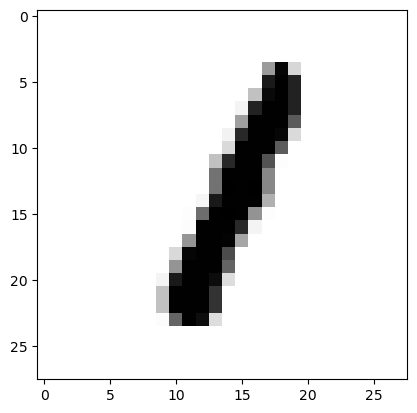

In [10]:
image_index = 6726
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model1.predict(x_test[image_index].reshape(1, 784, 1))
print(pred.argmax())